<a href="https://colab.research.google.com/github/TienNguyen0712/student-alcohol-consumption-data-mining/blob/main/notebooks/03_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **🎯 EDA Objective (Mục tiêu Khám phá dữ liệu)**


Mục tiêu của việc khám phá dữ liệu này là để tìm hiểu phân bố của các đặc trưng đồng thời cũng là cách để phát hiện các mối quan hệ đặc biệt giữa các đặc trưng với biên mục tiêu **G3** cụ thể như sau:

- Phân bố của biến mục tiêu G3
- Yếu tố thuộc nhóm học tập tới kết quả cuỗi kỳ
- Yếu tố sử dụng cồn đến với kết quả cuối kỳ
- Xã hội / Gia đình
- Mối quan hệ trực quan tới điểm cuối kỳ

Lựa chọn dãy màu sẽ sử dụng trong suốt quá trình Khám phá dữ liệu

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.family'] = 'serif'
plt.rcParams["figure.facecolor"] = "#fafafa"
plt.rcParams["axes.facecolor"] = "#fafafa"

In [36]:
student_merge = pd.read_csv('student_merge.csv')

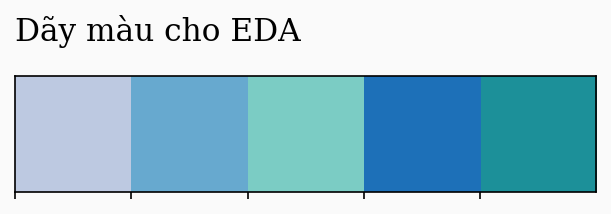

In [37]:
# Palette
palette = ["#bdc9e1", "#67a9cf", "#7bccc4", "#1d70b8", "#1c9099"]
sns.palplot(palette)

plt.title("Dãy màu cho EDA",loc='left',fontsize=15,y=1.2)
plt.show()

## **📈 Target Variable Distribution - G3 (Phân bố biến mục tiêu - G3)**


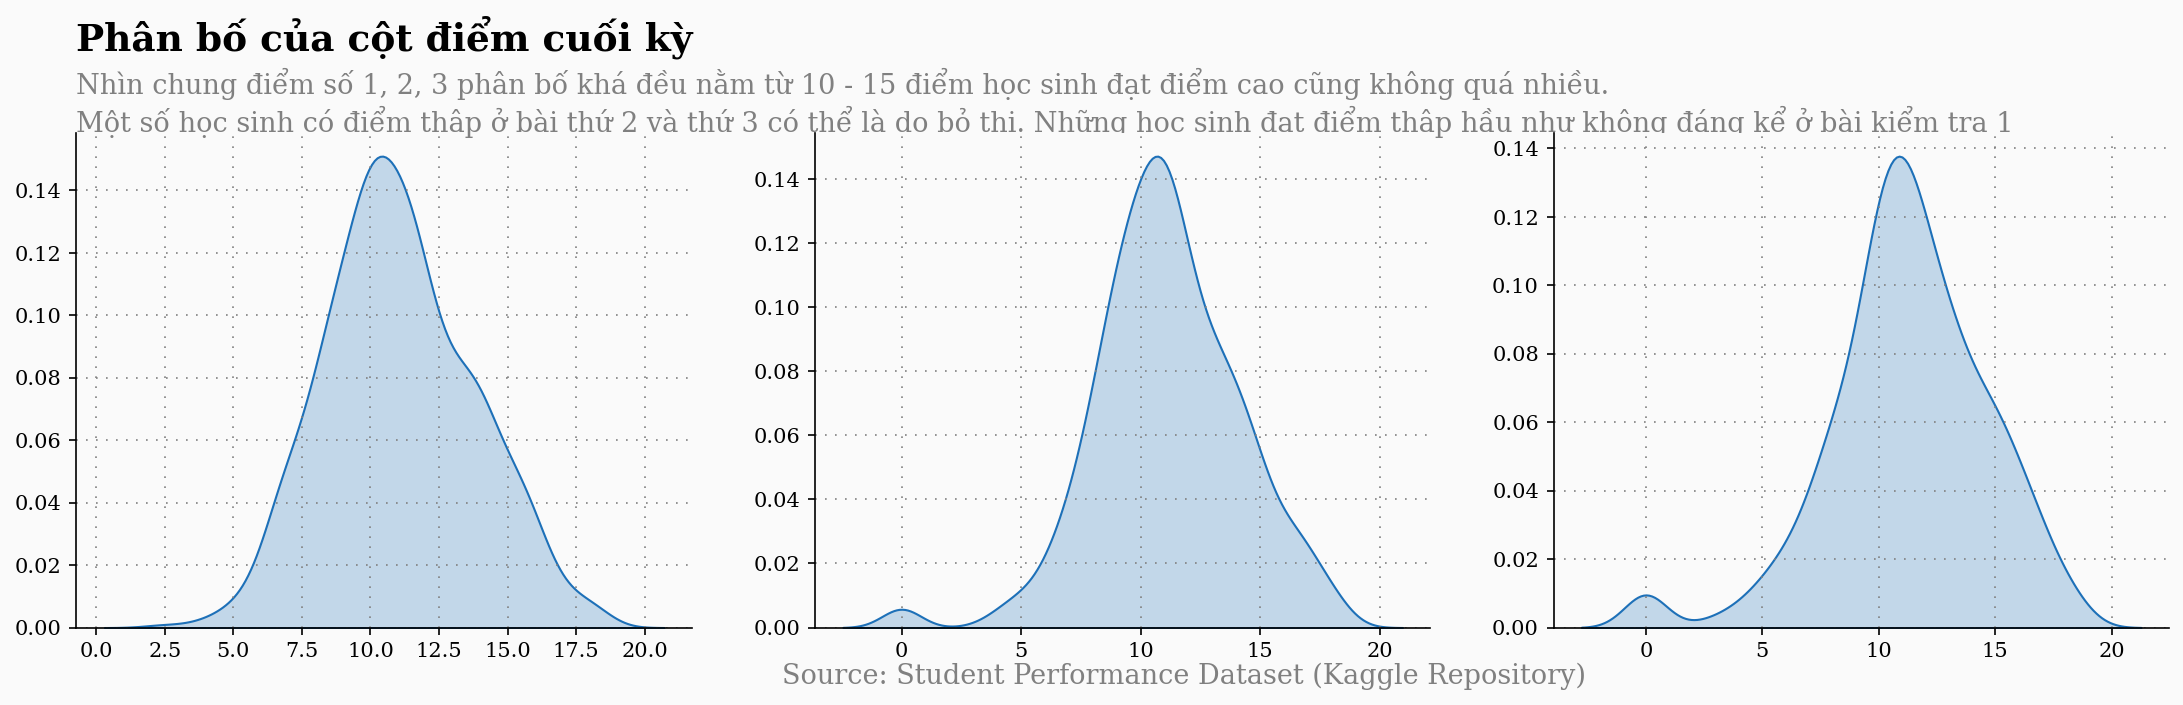

In [38]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.2, hspace=0.25)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])

for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)


sns.kdeplot(ax=ax0 ,x= student_merge["G1"], data=student_merge, color="#1d70b8", shade=True)
sns.kdeplot(ax=ax1 ,x= student_merge["G2"], data=student_merge, color="#1d70b8", shade=True)
sns.kdeplot(ax=ax2 ,x= student_merge["G3"], data=student_merge, color="#1d70b8", shade=True)


Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0.set_ylim([0,Yend])
ax0.text(Xstart,Yend+(Yend*0.15), "Phân bố của cột điểm cuối kỳ", fontsize=18, ha="left", va="bottom", weight="bold")
ax0.text(Xstart,Yend+(Yend*0.13), "Nhìn chung điểm số 1, 2, 3 phân bố khá đều nằm từ 10 - 15 điểm học sinh đạt điểm cao cũng không quá nhiều. \nMột số học sinh có điểm thâp ở bài thứ 2 và thứ 3 có thể là do bỏ thi. Những học sinh đạt điểm thâp hầu như không đáng kể ở bài kiểm tra 1", color="gray",
fontsize=13, ha="left", va="top")

ax0.text(25,-0.02, "Source: Student Performance Dataset (Kaggle Repository)", fontsize=13, ha="left", va="bottom", color="gray")


ax0.set_ylabel("")
ax1.set_ylabel("")
ax2.set_ylabel("")
ax0.set_xlabel("")
ax1.set_xlabel("")
ax2.set_xlabel("")


ax0.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax2.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

plt.show()

## **🎓 Academic Factors vs G3 (Nhóm học tập với Mục tiêu)**


In [39]:
academic_lists = ["shool", "higher", "paid", "absences", "failures", "studytime", "G1", "G2"]

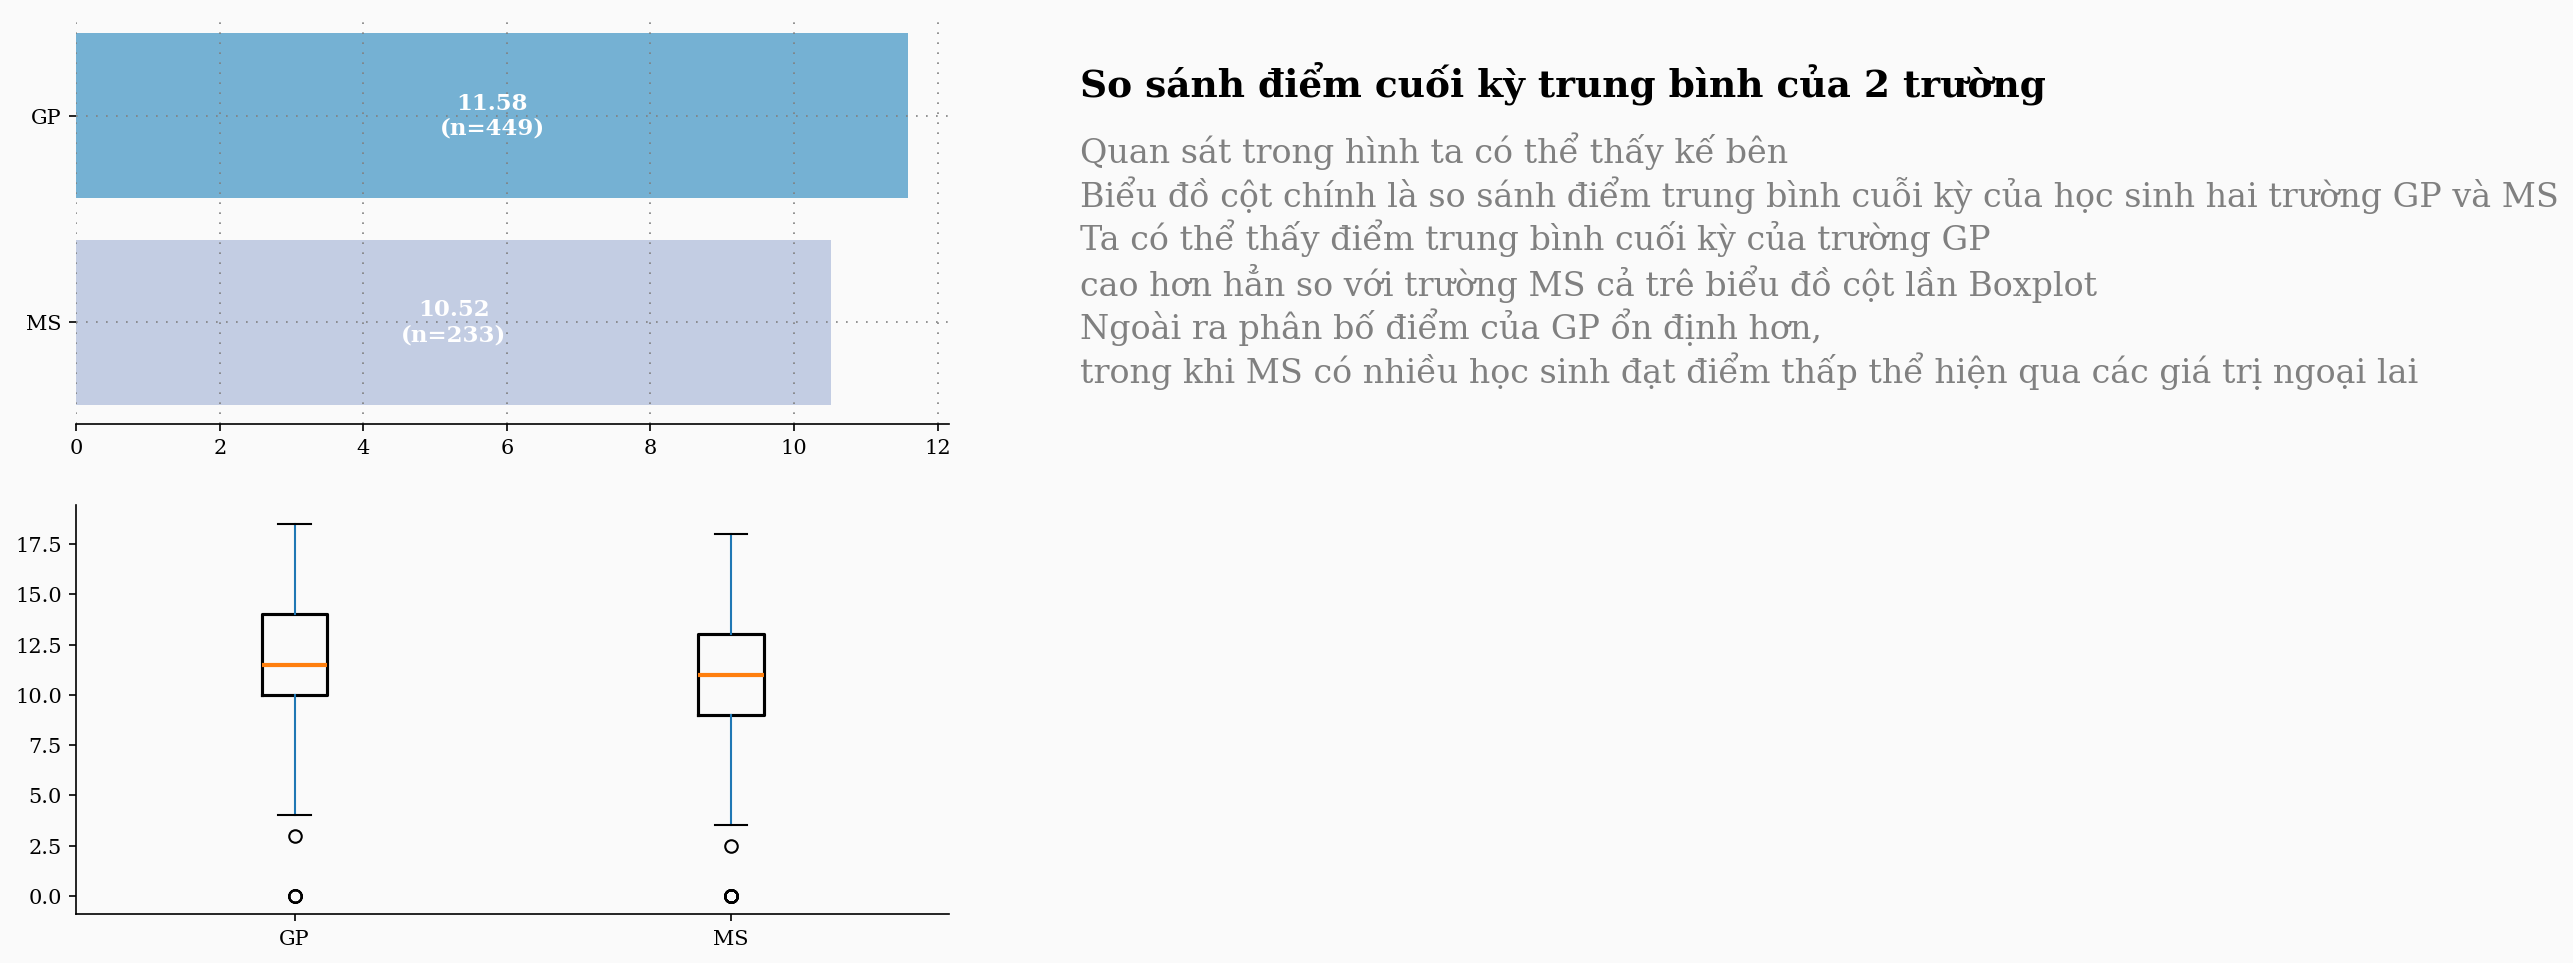

In [40]:
school_stats = (student_merge
                .groupby('school')['G3']
                .agg(mean='mean', n='count')
                .sort_values('mean'))

colors = palette

fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], width_ratios=[2, 1], hspace=0.2, wspace=0.2)

ax_bar = fig.add_subplot(gs[0, 0])
ax_text = fig.add_subplot(gs[0, 1])
ax_box = fig.add_subplot(gs[1, 0])


ax_bar.barh(school_stats.index, school_stats['mean'], color=colors, alpha=0.9)

for y, (mean_val, n_val) in enumerate(zip(school_stats['mean'], school_stats['n'])):
    ax_bar.annotate(f"{mean_val:.2f}\n(n={n_val})",
                    xy=(mean_val / 2, y),   # giữa cột
                    va='center', ha='center',
                    fontsize=11, color='white',
                    fontweight='bold')

ax_bar.set_xlabel("")
ax_bar.set_ylabel("")

for s in ['top', 'right', 'left']:
    ax_bar.spines[s].set_visible(False)

ax_bar.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
ax_bar.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

student_merge.boxplot(column='G3', by='school', ax=ax_box,
                      grid=False,
                      boxprops=dict(linewidth=1.5),
                      medianprops=dict(linewidth=2))
for s in ['top', 'right']:
    ax_box.spines[s].set_visible(False)

ax_box.set_xlabel("")
ax_box.set_ylabel("")
ax_box.set_title("")

plt.suptitle("")
ax_text.axis('off')  # Ẩn trục

ax_text.text(0, 0.8,
             "So sánh điểm cuối kỳ trung bình của 2 trường",
             fontsize=18, fontweight='bold', fontfamily='serif')

ax_text.text(0, 0.1,
             "Quan sát trong hình ta có thể thấy kế bên\nBiểu đồ cột chính là so sánh điểm trung bình cuỗi kỳ của học sinh hai trường GP và MS\n"
             "Ta có thể thấy điểm trung bình cuối kỳ của trường GP \ncao hơn hẳn so với trường MS cả trê biểu đồ cột lần Boxplot\n"
             "Ngoài ra phân bố điểm của GP ổn định hơn, \ntrong khi MS có nhiều học sinh đạt điểm thấp thể hiện qua các giá trị ngoại lai",
             fontsize=16,  color="gray")

plt.show()

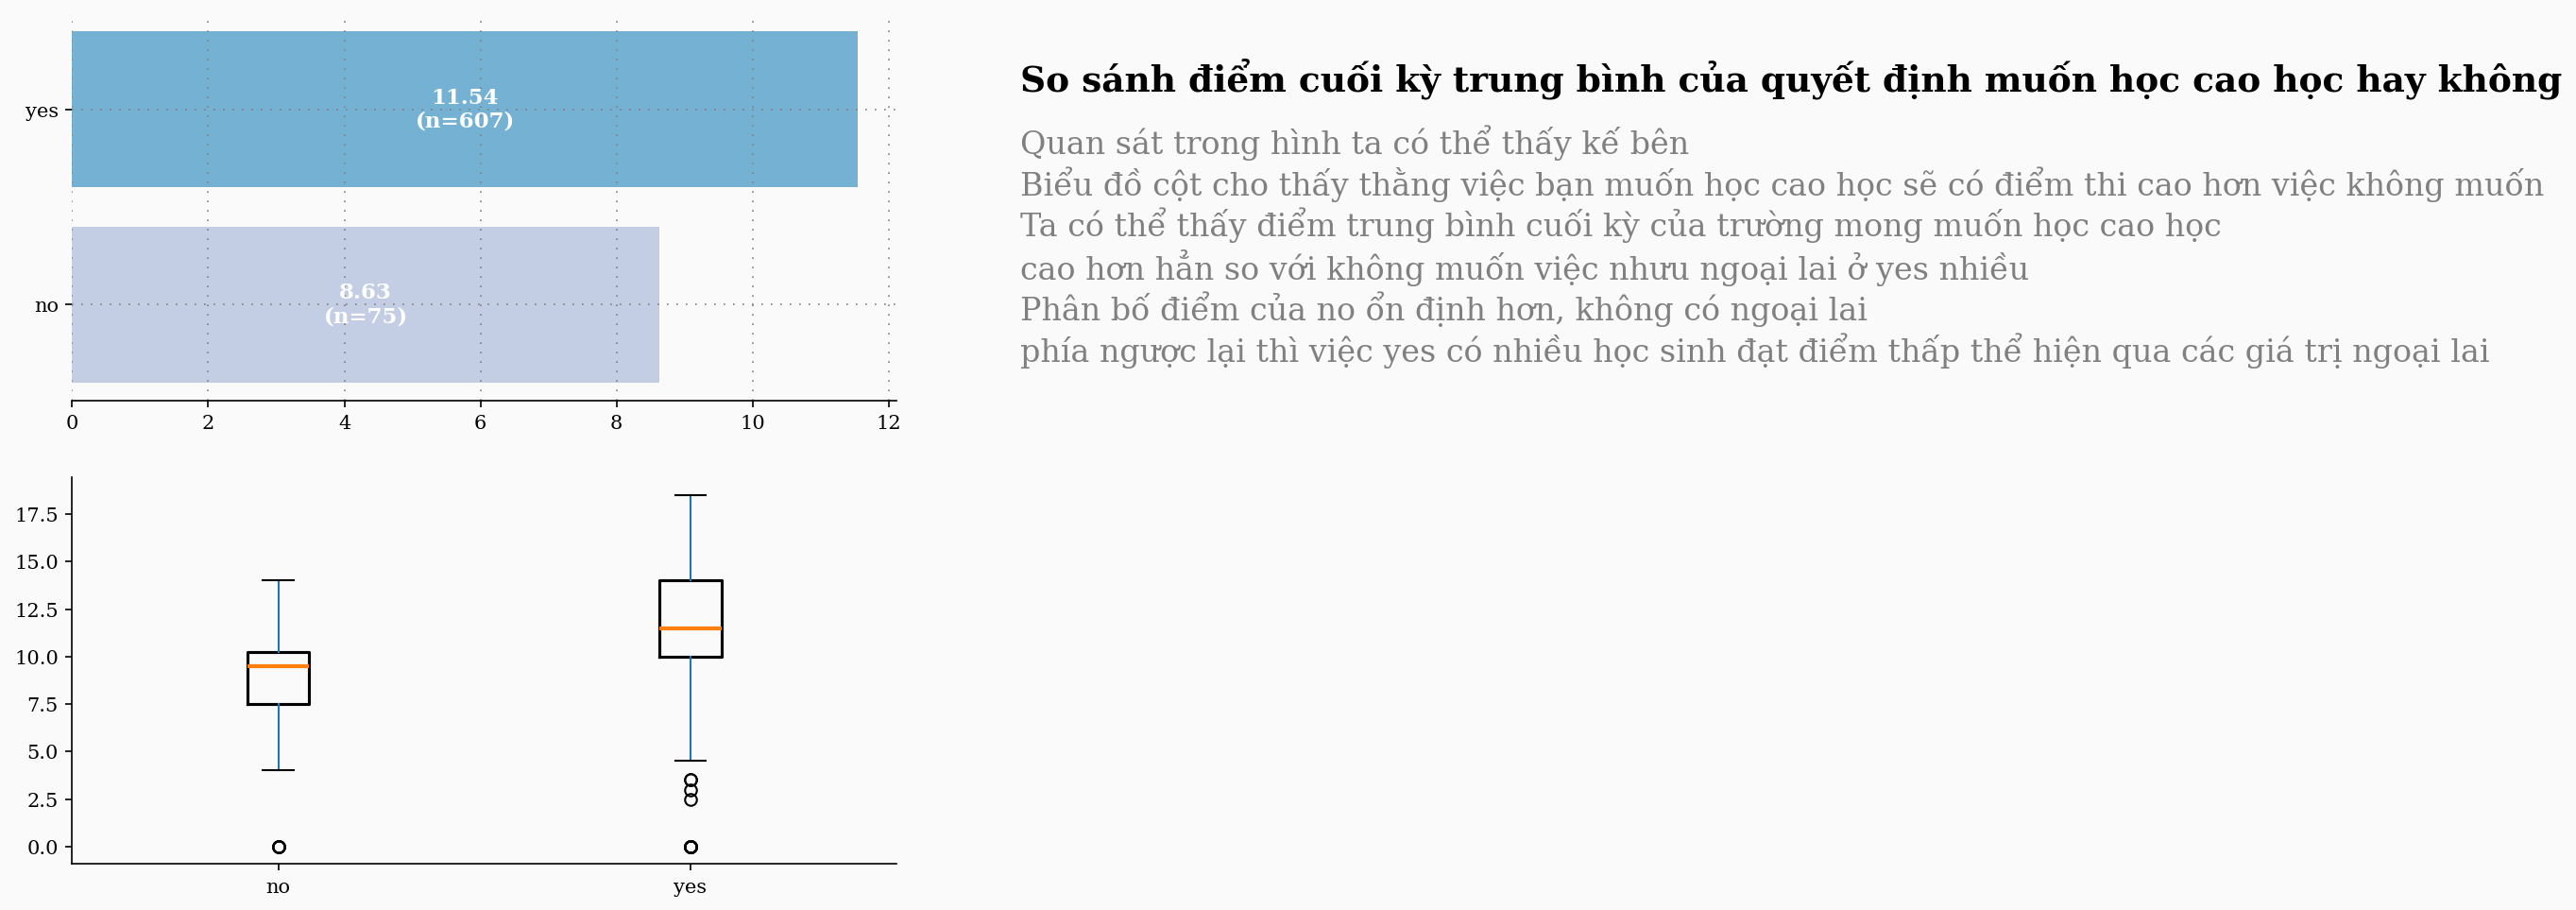

In [41]:
higher_stats = (student_merge
                .groupby('higher')['G3']
                .agg(mean='mean', n='count')
                .sort_values('mean'))

colors = palette

fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], width_ratios=[2, 1], hspace=0.2, wspace=0.2)

ax_bar = fig.add_subplot(gs[0, 0])
ax_text = fig.add_subplot(gs[0, 1])
ax_box = fig.add_subplot(gs[1, 0])


ax_bar.barh(higher_stats.index, higher_stats['mean'], color=colors, alpha=0.9)

for y, (mean_val, n_val) in enumerate(zip(higher_stats['mean'], higher_stats['n'])):
    ax_bar.annotate(f"{mean_val:.2f}\n(n={n_val})",
                    xy=(mean_val / 2, y),   # giữa cột
                    va='center', ha='center',
                    fontsize=11, color='white',
                    fontweight='bold')

ax_bar.set_xlabel("")
ax_bar.set_ylabel("")

for s in ['top', 'right', 'left']:
    ax_bar.spines[s].set_visible(False)

ax_bar.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
ax_bar.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

student_merge.boxplot(column='G3', by='higher', ax=ax_box,
                      grid=False,
                      boxprops=dict(linewidth=1.5),
                      medianprops=dict(linewidth=2))

for s in ['top', 'right']:
    ax_box.spines[s].set_visible(False)

ax_box.set_xlabel("")
ax_box.set_ylabel("")
ax_box.set_title("")

plt.suptitle("")
ax_text.axis('off')  # Ẩn trục

ax_text.text(0, 0.8,
             "So sánh điểm cuối kỳ trung bình của quyết định muốn học cao học hay không",
             fontsize=18, fontweight='bold', fontfamily='serif')

ax_text.text(0, 0.1,
             "Quan sát trong hình ta có thể thấy kế bên\nBiểu đồ cột cho thấy thằng việc bạn muốn học cao học sẽ có điểm thi cao hơn việc không muốn\n"
             "Ta có thể thấy điểm trung bình cuối kỳ của trường mong muốn học cao học \ncao hơn hẳn so với không muốn việc nhưu ngoại lai ở yes nhiều\n"
             "Phân bố điểm của no ổn định hơn, không có ngoại lai \nphía ngược lại thì việc yes có nhiều học sinh đạt điểm thấp thể hiện qua các giá trị ngoại lai",
             fontsize=16,  color="gray")

plt.show()

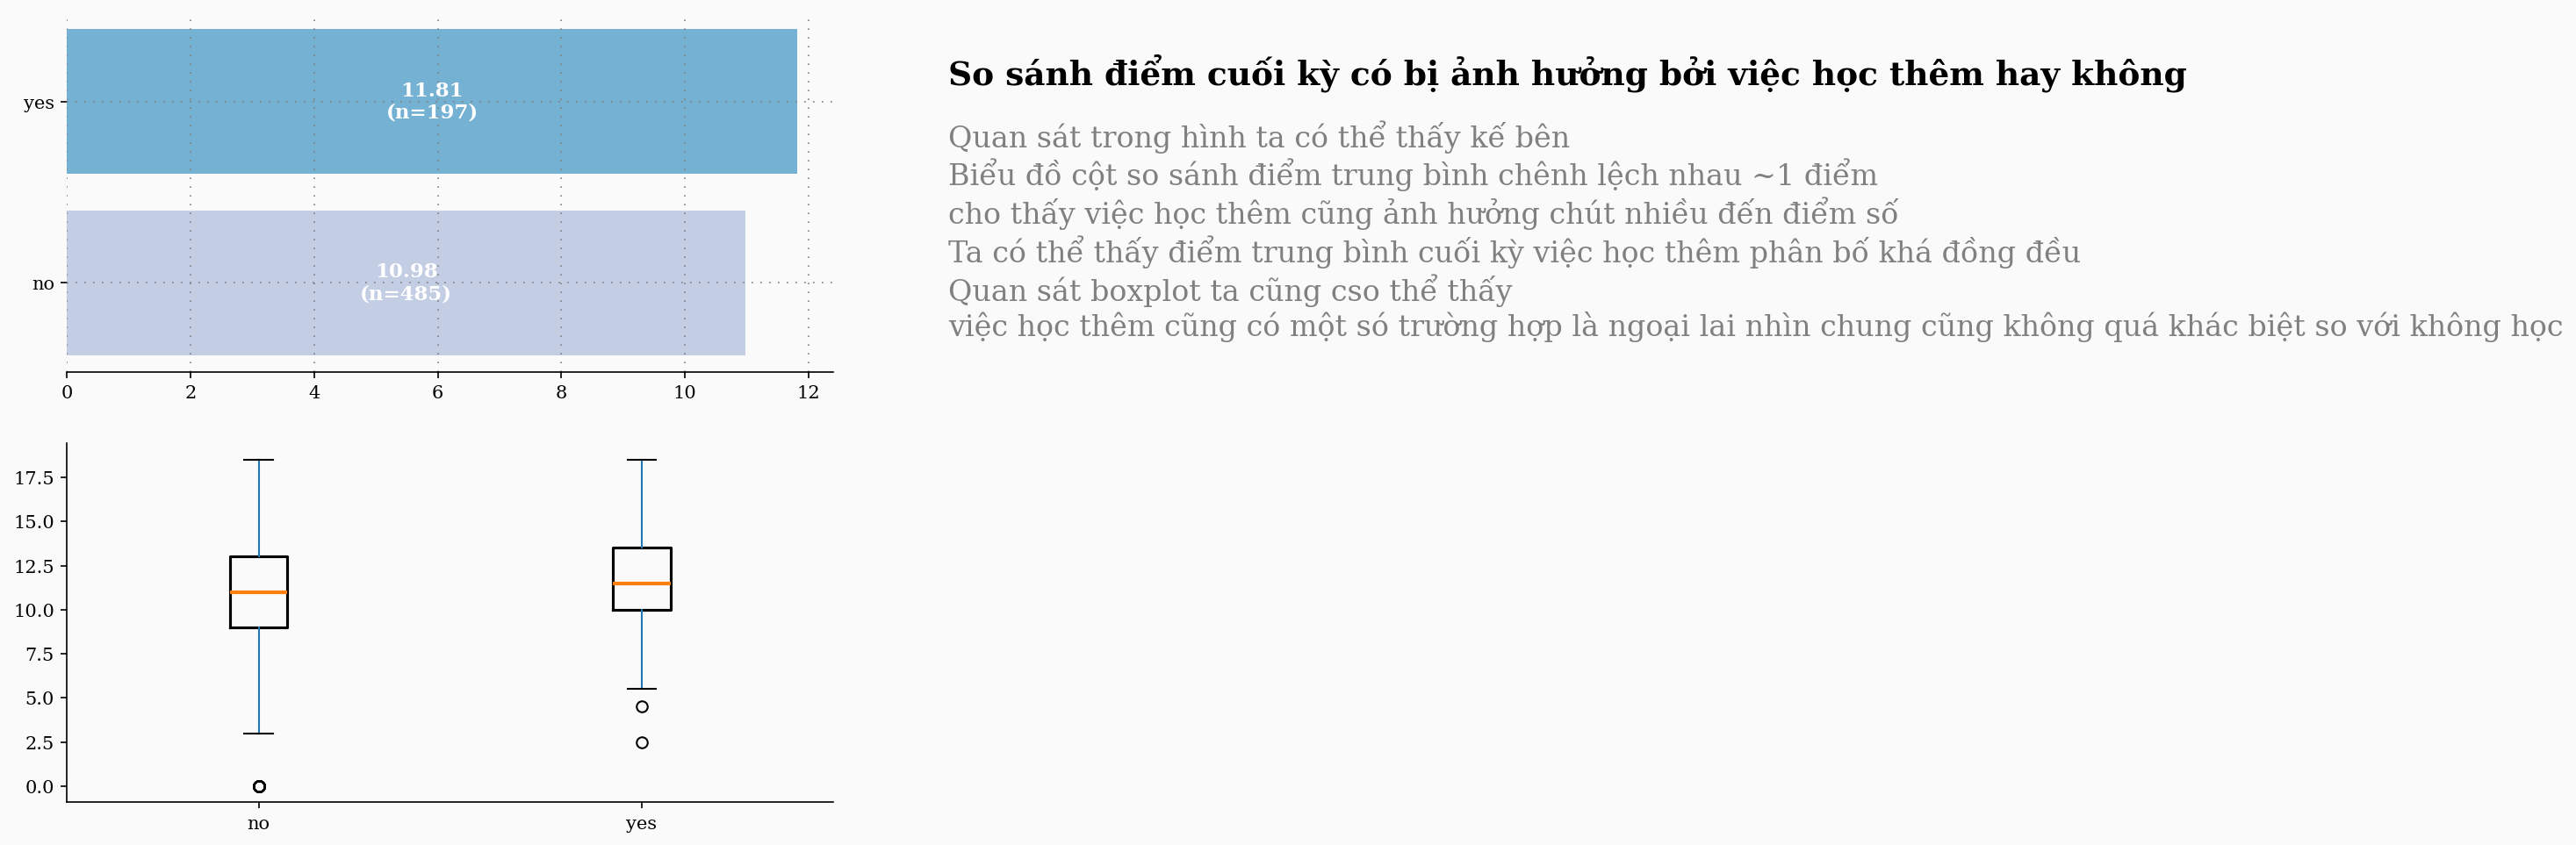

In [54]:
paid_stats = (student_merge
                .groupby('paid')['G3']
                .agg(mean='mean', n='count')
                .sort_values('mean'))

colors = palette

fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], width_ratios=[2, 1], hspace=0.2, wspace=0.2)

ax_bar = fig.add_subplot(gs[0, 0])
ax_text = fig.add_subplot(gs[0, 1])
ax_box = fig.add_subplot(gs[1, 0])


ax_bar.barh(paid_stats.index, paid_stats['mean'], color=colors, alpha=0.9)

for y, (mean_val, n_val) in enumerate(zip(paid_stats['mean'], paid_stats['n'])):
    ax_bar.annotate(f"{mean_val:.2f}\n(n={n_val})",
                    xy=(mean_val / 2, y),   # giữa cột
                    va='center', ha='center',
                    fontsize=11, color='white',
                    fontweight='bold')

ax_bar.set_xlabel("")
ax_bar.set_ylabel("")

for s in ['top', 'right', 'left']:
    ax_bar.spines[s].set_visible(False)

ax_bar.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
ax_bar.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

student_merge.boxplot(column='G3', by='paid', ax=ax_box,
                      grid=False,
                      boxprops=dict(linewidth=1.5),
                      medianprops=dict(linewidth=2))

for s in ['top', 'right']:
    ax_box.spines[s].set_visible(False)

ax_box.set_xlabel("")
ax_box.set_ylabel("")
ax_box.set_title("")

plt.suptitle("")
ax_text.axis('off')  # Ẩn trục

ax_text.text(0, 0.8,
             "So sánh điểm cuối kỳ có bị ảnh hưởng bởi việc học thêm hay không",
             fontsize=18, fontweight='bold', fontfamily='serif')

ax_text.text(0, 0.1,
             "Quan sát trong hình ta có thể thấy kế bên\nBiểu đồ cột so sánh điểm trung bình chênh lệch nhau ~1 điểm\ncho thấy việc học thêm cũng ảnh hưởng chút nhiều đến điểm số\n"
             "Ta có thể thấy điểm trung bình cuối kỳ việc học thêm phân bố khá đồng đều\n"
             "Quan sát boxplot ta cũng cso thể thấy \nviệc học thêm cũng có một só trường hợp là ngoại lai nhìn chung cũng không quá khác biệt so với không học",
             fontsize=16,  color="gray")

plt.show()

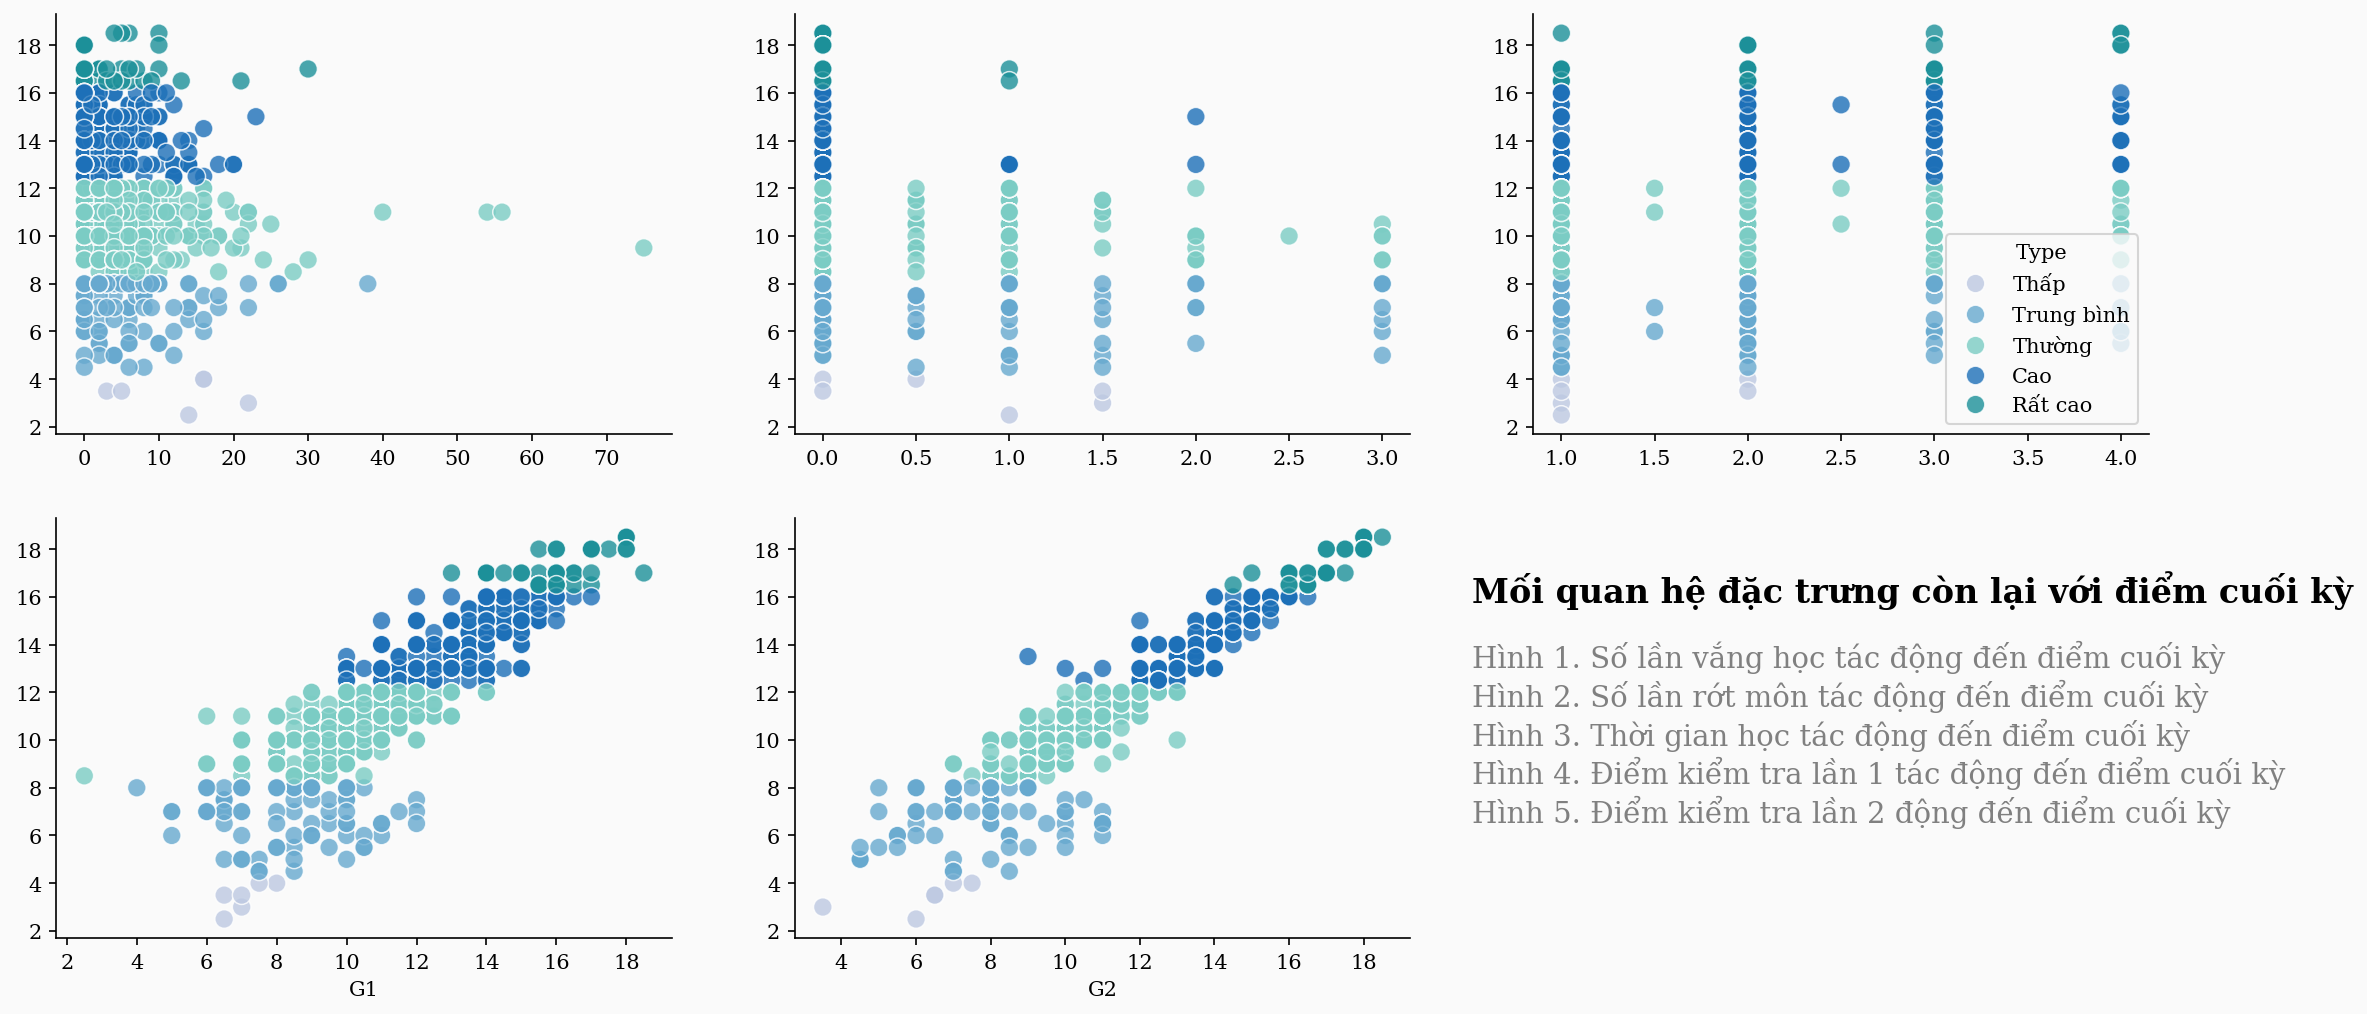

In [53]:
student_merge["Type"] = pd.cut(
    student_merge["G3"],
    bins = [0, 4, 8, 12, 16, 20],
    labels = ["Thấp", "Trung bình", "Thường", "Cao", "Rất cao"]
)

colors = palette

fig = plt.figure(figsize=(18, 8))
gs = fig.add_gridspec(2, 3, hspace=0.2, wspace=0.2)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])

sns.scatterplot(
    ax=ax0,
    data=student_merge,
    x="absences",
    y="G3",
    hue="Type",
    legend=False,
    palette=palette,
    alpha=0.8,
    s=80
)

sns.scatterplot(
    ax=ax1,
    data=student_merge,
    x="failures",
    y="G3",
    hue="Type",
    palette=palette,
    legend=False,
    alpha=0.8,
    s=80
)

sns.scatterplot(
    ax=ax2,
    data=student_merge,
    x="studytime",
    y="G3",
    hue="Type",
    palette=palette,
    alpha=0.8,
    s=80
)

sns.scatterplot(
    ax=ax3,
    data=student_merge,
    x="G1",
    y="G3",
    hue="Type",
    palette=palette,
    legend=False,
    alpha=0.8,
    s=80
)

sns.scatterplot(
    ax=ax4,
    data=student_merge,
    x="G2",
    y="G3",
    hue="Type",
    palette=palette,
    legend=False,
    alpha=0.8,
    s=80
)

for s in ['top', 'right']:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)

plt.suptitle("")
ax5.axis('off')  # Ẩn trục

ax0.set_xlabel("")
ax0.set_ylabel("")
ax1.set_xlabel("")
ax1.set_ylabel("")
ax2.set_xlabel("")
ax2.set_ylabel("")
ax3.set_xlabel("G1")
ax3.set_ylabel("")
ax4.set_xlabel("G2")
ax4.set_ylabel("")



ax5.text(-0.1, 0.8,
             "Mối quan hệ đặc trưng còn lại với điểm cuối kỳ",
             fontsize=16, fontweight='bold')

ax5.text(-0.1, 0.2,
             "Hình 1. Số lần vắng học tác động đến điểm cuối kỳ\n"
             "Hình 2. Số lần rớt môn tác động đến điểm cuối kỳ\n"
             "Hình 3. Thời gian học tác động đến điểm cuối kỳ\n"
             "Hình 4. Điểm kiểm tra lần 1 tác động đến điểm cuối kỳ\n"
             "Hình 5. Điểm kiểm tra lần 2 động đến điểm cuối kỳ\n",
             fontsize=14,  color="gray")

plt.show()

**Insight**

Quan sát các biều đồ ta có nhận xét sau

Hình 1
- Số lần vắng học có ảnh hưởng đến kết quả học tập
- Phân chia thành các nhóm rõ ràng
- Ta quan sát khi ta vắng học càng ít thì kết quả học tập của ta có thể nằm trogn mức độ **Bình thường - Cao**
- Có một số học sinh nghr trên 40 buổi điểm nằm ở trung bifh
- Điều này cũng dự báo rằng việc nghỉ học nhiều có khả năng sẽ ảnh hưởng đến kết quả học tập

Hình 2
- Nhũng học sinh chưa rớt lần nào là chủ yếu
- Tuy nhiên cũng có một só trường hợp là thi lại nhiều lất và thường sẽ không có xu hương điểm cao và điểm chri nằm trong khoảng **Trung bình đến thường**

Hình 3
- Cho thấy việc nếu giành thời gian ít cho việc học thì điểm kiểm tra của ta vẫn cao tuy nhiên rủi ro điểm thấp cũng là có thể
- Nhưng khi ta giành thười gian học từ hơn **mức độ 2 đến 4** điểm của ta không thể là ở mức thấp được và có thể năng sẽ từ **trung bình trở lên**
- Điều này quyết định rằng việc giành thời gian hộc cũng quyết định đến kết quả hộc tập

Hình 4 và Hình 5
- Đánh giá chung 2 điểm G1 và G2 đều có mối quan hệ tuyết tính mạnh đến với điểm cuối kỳ
- Ta có nhận xét **Điểm G1 và G2 càng cao thì điểm cuối kỳ sẽ cao** cỉ có nhưng trường hợp hiếm nhwung điểm này không cao nên điểm xảy ra cũng thấp theo


## **🍺 Alcohol Consumption vs G3 (Nhóm cồn với Mục tiêu)**


In [44]:
alcohol_lists = ["Dalc", "Walc"]

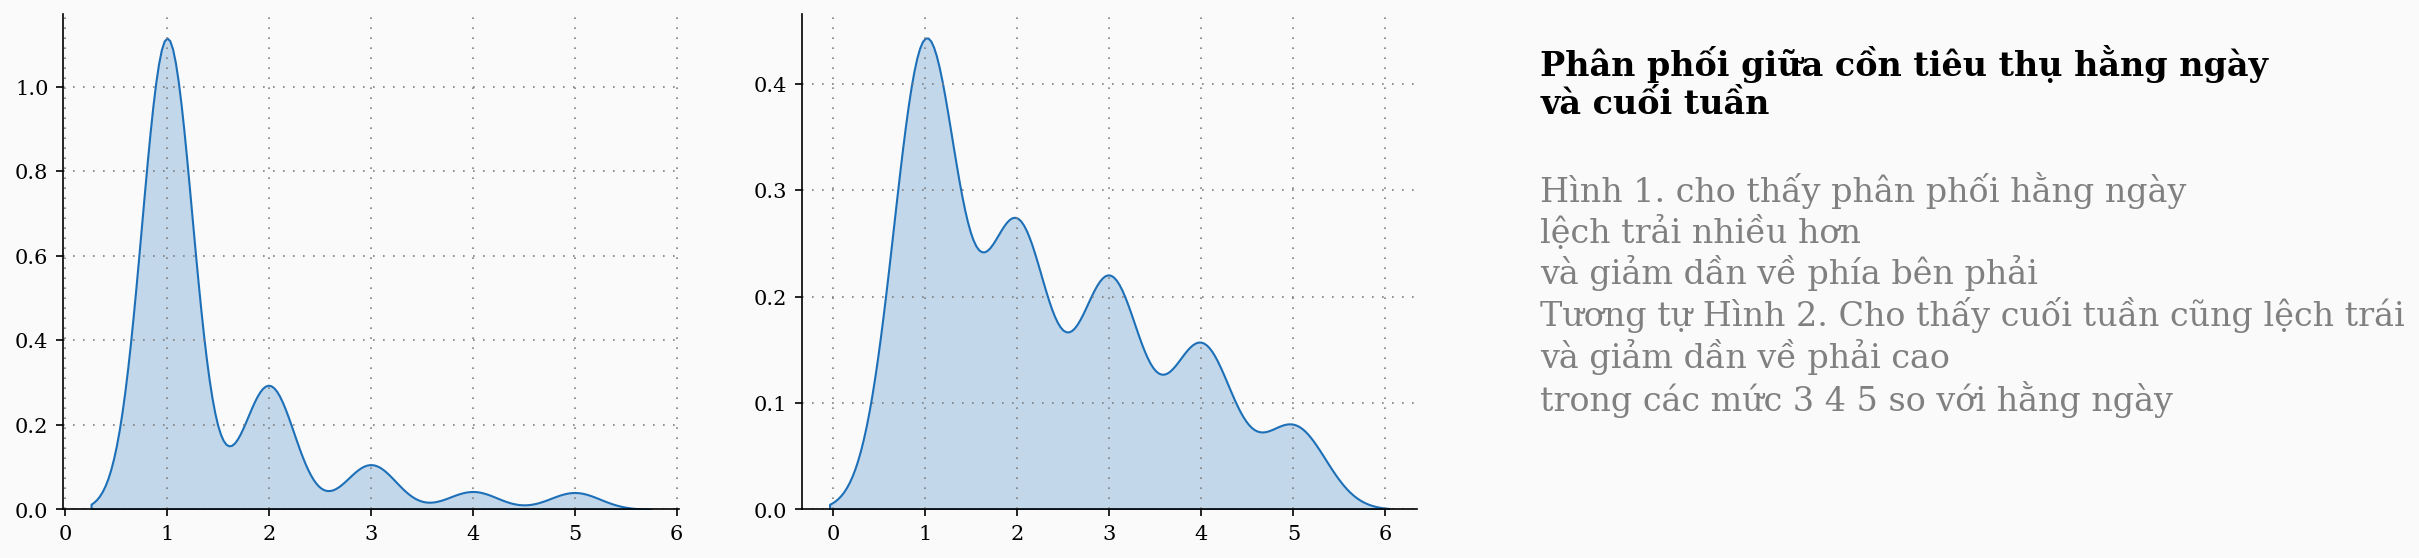

In [107]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.2, hspace=0.25)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])

for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)

sns.kdeplot(ax=ax0 ,x= student_merge["Dalc"], data=student_merge, color="#1d70b8", shade=True)
sns.kdeplot(ax=ax1 ,x= student_merge["Walc"], data=student_merge, color="#1d70b8", shade=True)

ax0.set_ylabel("")
ax1.set_ylabel("")
ax0.set_xlabel("")
ax1.set_xlabel("")

ax0.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))



plt.suptitle("")
ax2.axis('off')  # Ẩn trục

ax2.text(0, 0.8,
             "Phân phối giữa cồn tiêu thụ hằng ngày\nvà cuối tuần",
             fontsize=16, fontweight='bold')

ax2.text(0, 0.2,
             "Hình 1. cho thấy phân phối hằng ngày\nlệch trải nhiều hơn\nvà giảm dần về phía bên phải\n"
             "Tương tự Hình 2. Cho thấy cuối tuần cũng lệch trái\nvà giảm dần về phải cao\ntrong các mức 3 4 5 so với hằng ngày",
             fontsize=16,  color="gray")
plt.show()

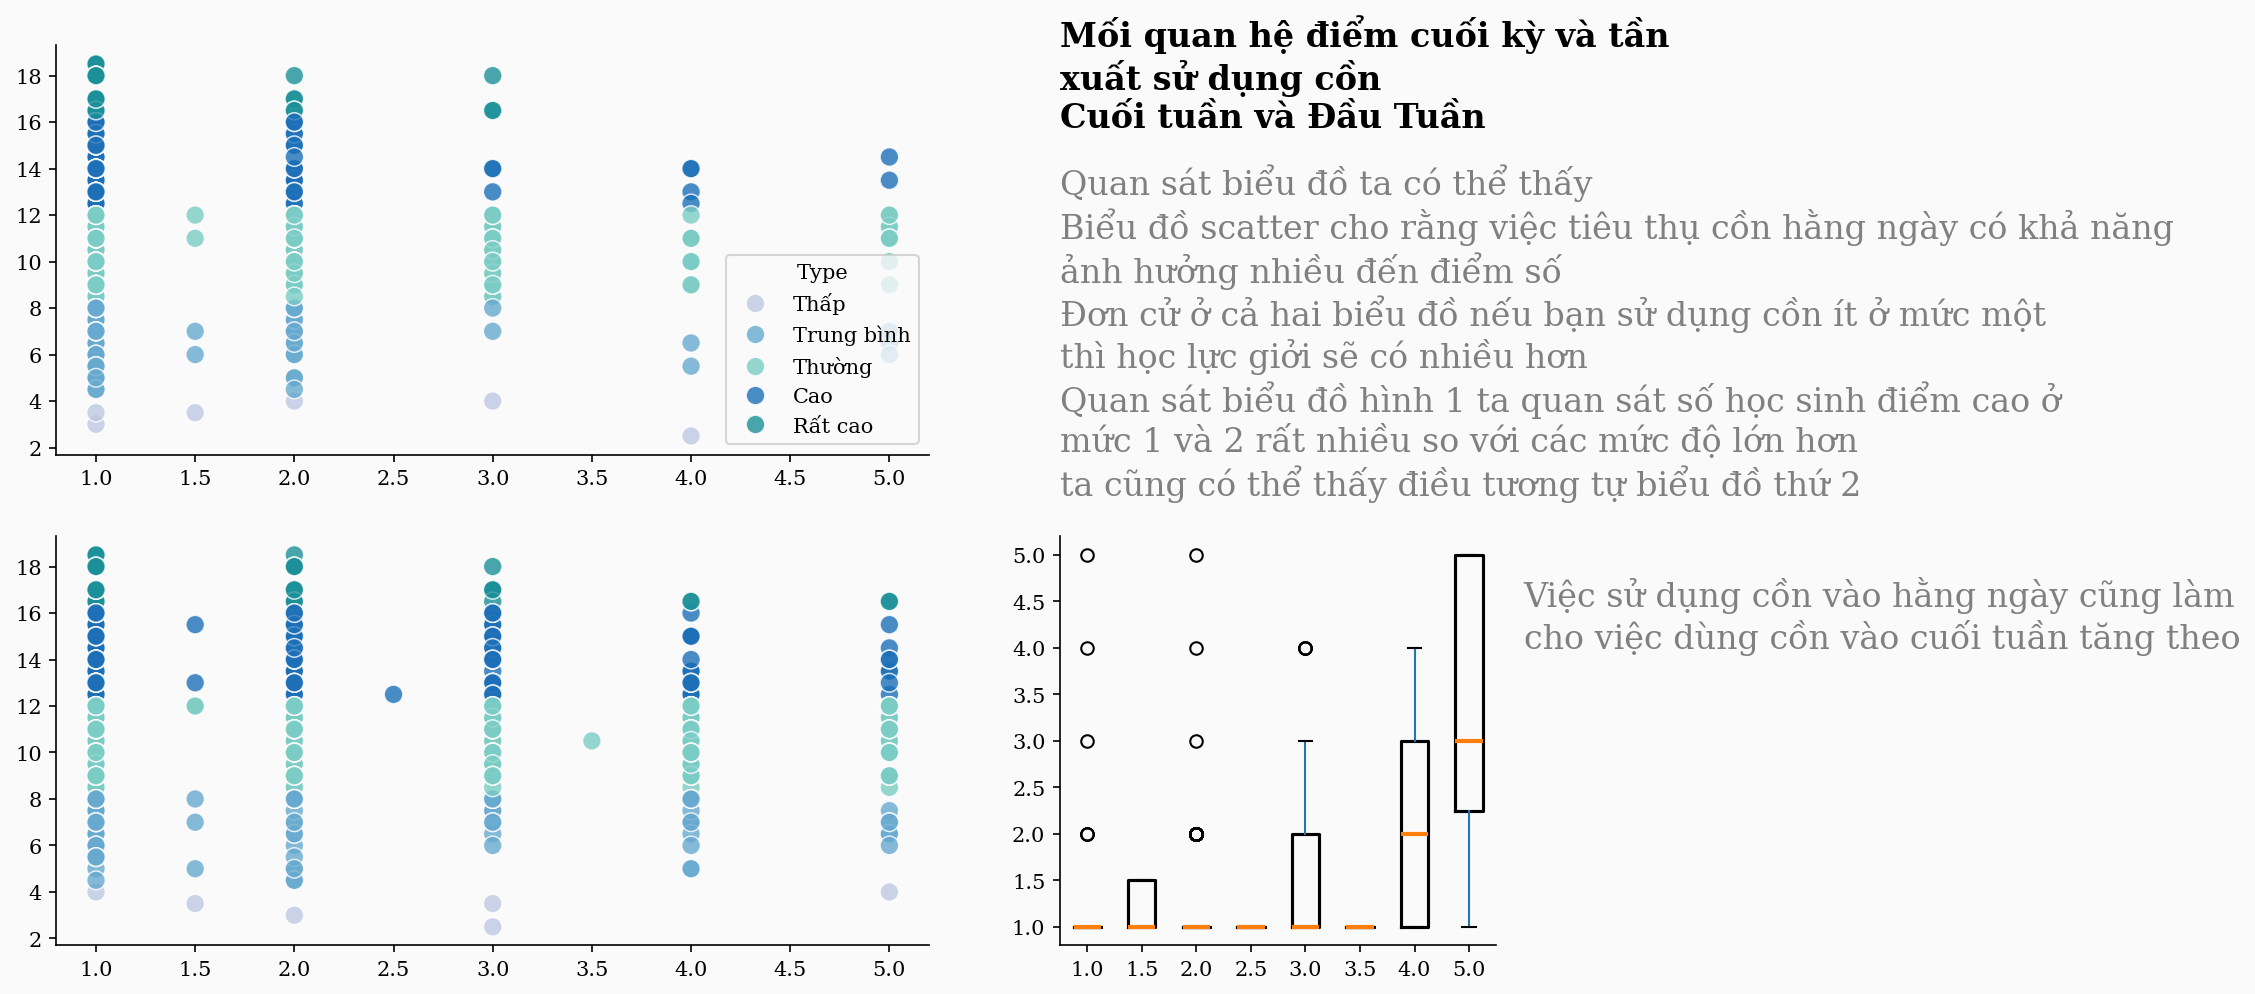

In [114]:
student_merge["Type"] = pd.cut(
    student_merge["G3"],
    bins = [0, 4, 8, 12, 16, 20],
    labels = ["Thấp", "Trung bình", "Thường", "Cao", "Rất cao"]
)



fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], width_ratios=[2, 1], hspace=0.2, wspace=0.2)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])


sns.scatterplot(
    ax=ax0,
    data=student_merge,
    x="Dalc",
    y="G3",
    hue="Type",
    palette=palette,
    alpha=0.8,
    s=80
)

sns.scatterplot(
    ax=ax2,
    data=student_merge,
    x="Walc",
    y="G3",
    hue="Type",
    palette=palette,
    legend=False,
    alpha=0.8,
    s=80
)

for s in ['top', 'right']:
    ax0.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)


ax0.set_xlabel("")
ax0.set_ylabel("")
ax2.set_xlabel("")
ax2.set_ylabel("")


student_merge.boxplot(column='Dalc', by='Walc', ax=ax3,
                      grid=False,
                      boxprops=dict(linewidth=1.5),
                      medianprops=dict(linewidth=2))

for s in ['top', 'right']:
    ax3.spines[s].set_visible(False)

ax3.text(9.0, 4.0,
             "Việc sử dụng cồn vào hằng ngày cũng làm\ncho việc dùng cồn vào cuối tuần tăng theo",
             fontsize=16, color="gray")
ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title("")


plt.suptitle("")
ax1.axis('off')  # Ẩn trục

ax1.text(0, 0.8,
             "Mối quan hệ điểm cuối kỳ và tần\nxuất sử dụng cồn\nCuối tuần và Đầu Tuần",
             fontsize=16, fontweight='bold')

ax1.text(0, -0.1,
             "Quan sát biểu đồ ta có thể thấy\nBiểu đồ scatter cho rằng việc tiêu thụ cồn hằng ngày có khả năng\nảnh hưởng nhiều đến điểm số\n"
             "Đơn cử ở cả hai biểu đồ nếu bạn sử dụng cồn ít ở mức một\nthì học lực giởi sẽ có nhiều hơn\n"
             "Quan sát biểu đồ hình 1 ta quan sát số học sinh điểm cao ở\nmức 1 và 2 rất nhiều so với các mức độ lớn hơn\nta cũng có thể thấy điều tương tự biểu đồ thứ 2",
             fontsize=16,  color="gray")

plt.show()

## **👨‍👩‍👧‍👦 Social & Family Factors (Nhóm xã hội và Gia đình)**


In [46]:
social_family_lists = ["famrel", "Medu", "Fedu", "goout", "romantic", "schoolsup", "internet", "freetime"]

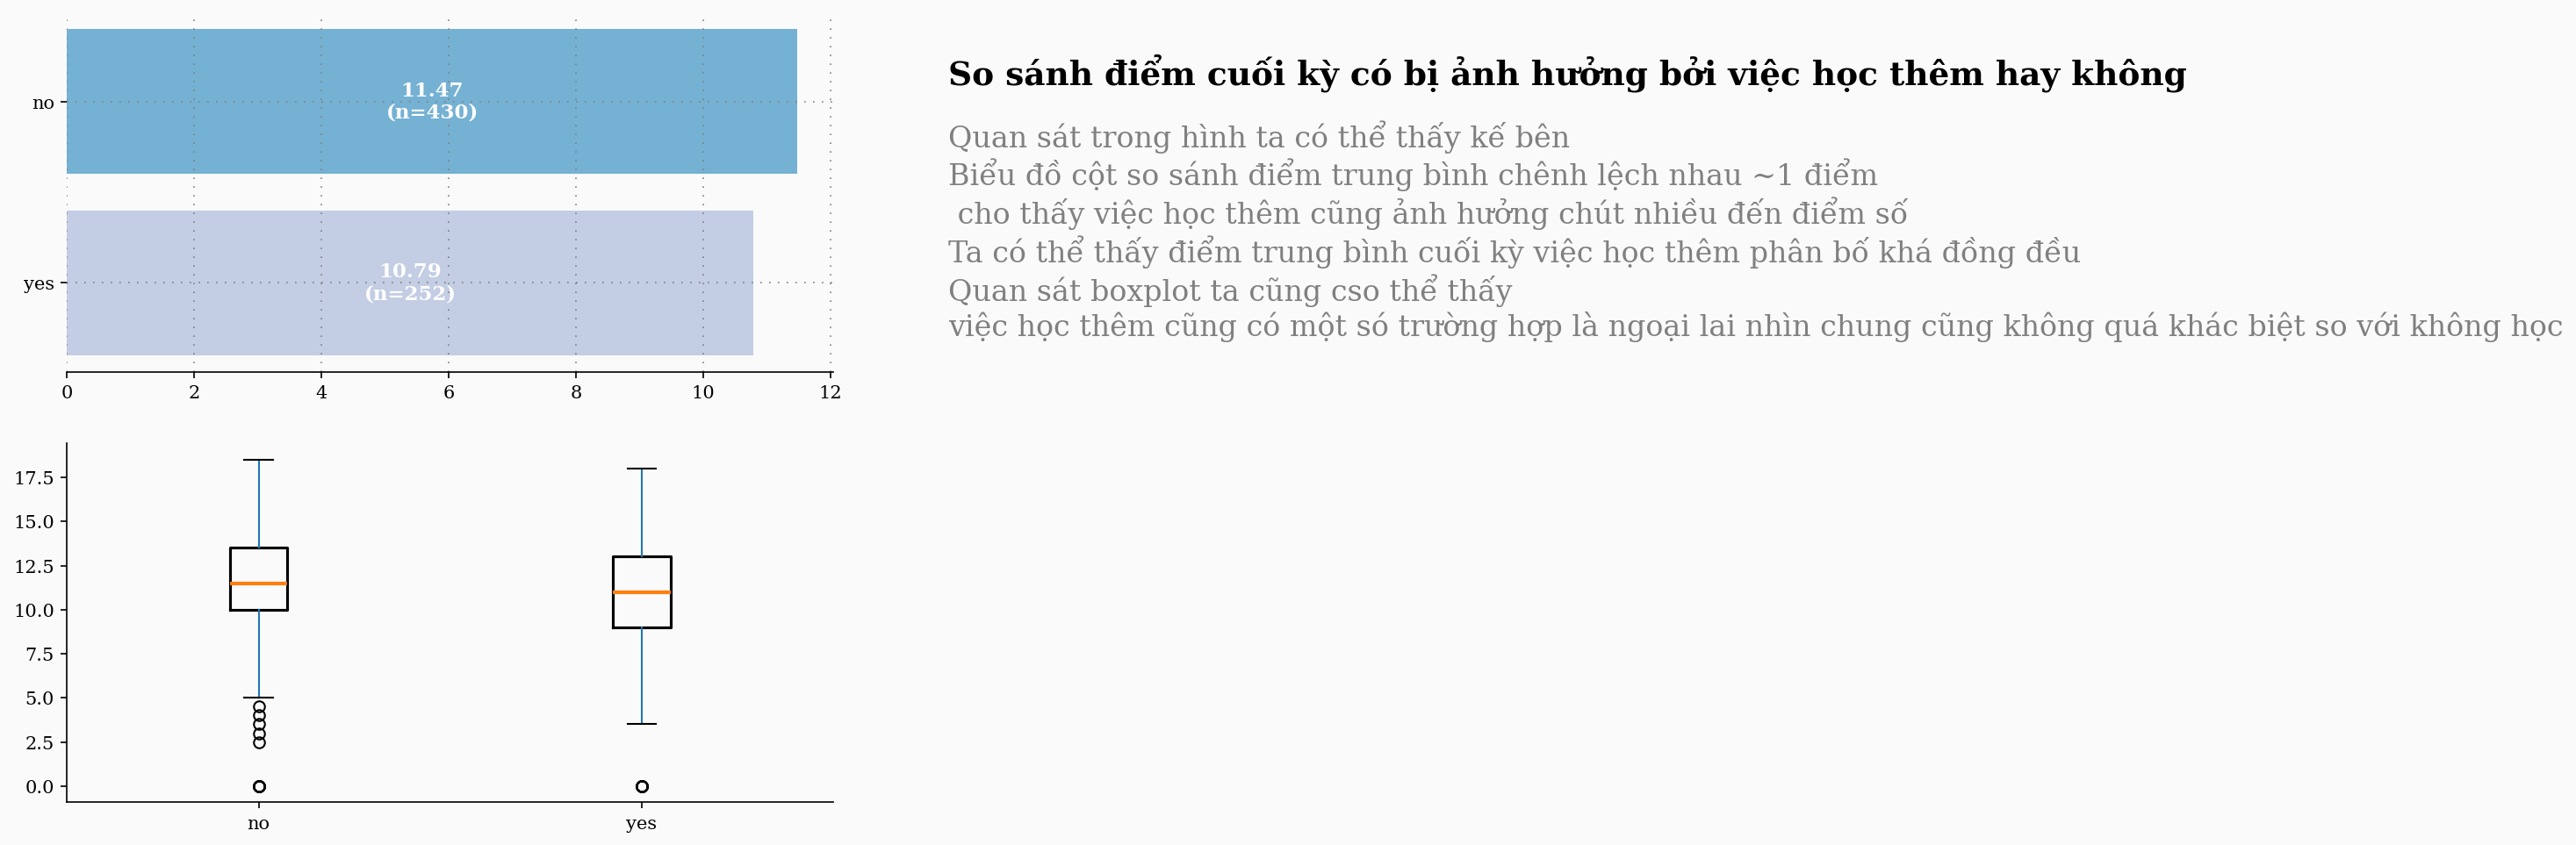

In [47]:
romantic_stats = (student_merge
                .groupby('romantic')['G3']
                .agg(mean='mean', n='count')
                .sort_values('mean'))

colors = palette

fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], width_ratios=[2, 1], hspace=0.2, wspace=0.2)

ax_bar = fig.add_subplot(gs[0, 0])
ax_text = fig.add_subplot(gs[0, 1])
ax_box = fig.add_subplot(gs[1, 0])


ax_bar.barh(romantic_stats.index, romantic_stats['mean'], color=colors, alpha=0.9)

for y, (mean_val, n_val) in enumerate(zip(romantic_stats['mean'], romantic_stats['n'])):
    ax_bar.annotate(f"{mean_val:.2f}\n(n={n_val})",
                    xy=(mean_val / 2, y),   # giữa cột
                    va='center', ha='center',
                    fontsize=11, color='white',
                    fontweight='bold')

ax_bar.set_xlabel("")
ax_bar.set_ylabel("")

for s in ['top', 'right', 'left']:
    ax_bar.spines[s].set_visible(False)

ax_bar.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
ax_bar.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

student_merge.boxplot(column='G3', by='romantic', ax=ax_box,
                      grid=False,
                      boxprops=dict(linewidth=1.5),
                      medianprops=dict(linewidth=2))

for s in ['top', 'right']:
    ax_box.spines[s].set_visible(False)

ax_box.set_xlabel("")
ax_box.set_ylabel("")
ax_box.set_title("")

plt.suptitle("")
ax_text.axis('off')  # Ẩn trục

ax_text.text(0, 0.8,
             "So sánh điểm cuối kỳ có bị ảnh hưởng bởi việc hẹn hò hay không",
             fontsize=18, fontweight='bold', fontfamily='serif')

ax_text.text(0, 0.1,
             "Quan sát trong hình ta có thể thấy kế bên\nBiểu đồ cột so sánh điểm trung bình chênh lệch nhau ~1 điểm\n cho thấy việc học thêm cũng ảnh hưởng chút nhiều đến điểm số\n"
             "Ta có thể thấy điểm trung bình cuối kỳ việc học thêm phân bố khá đồng đều\n"
             "Quan sát boxplot ta cũng cso thể thấy \nviệc học thêm cũng có một só trường hợp là ngoại lai nhìn chung cũng không quá khác biệt so với không học",
             fontsize=16,  color="gray")

plt.show()

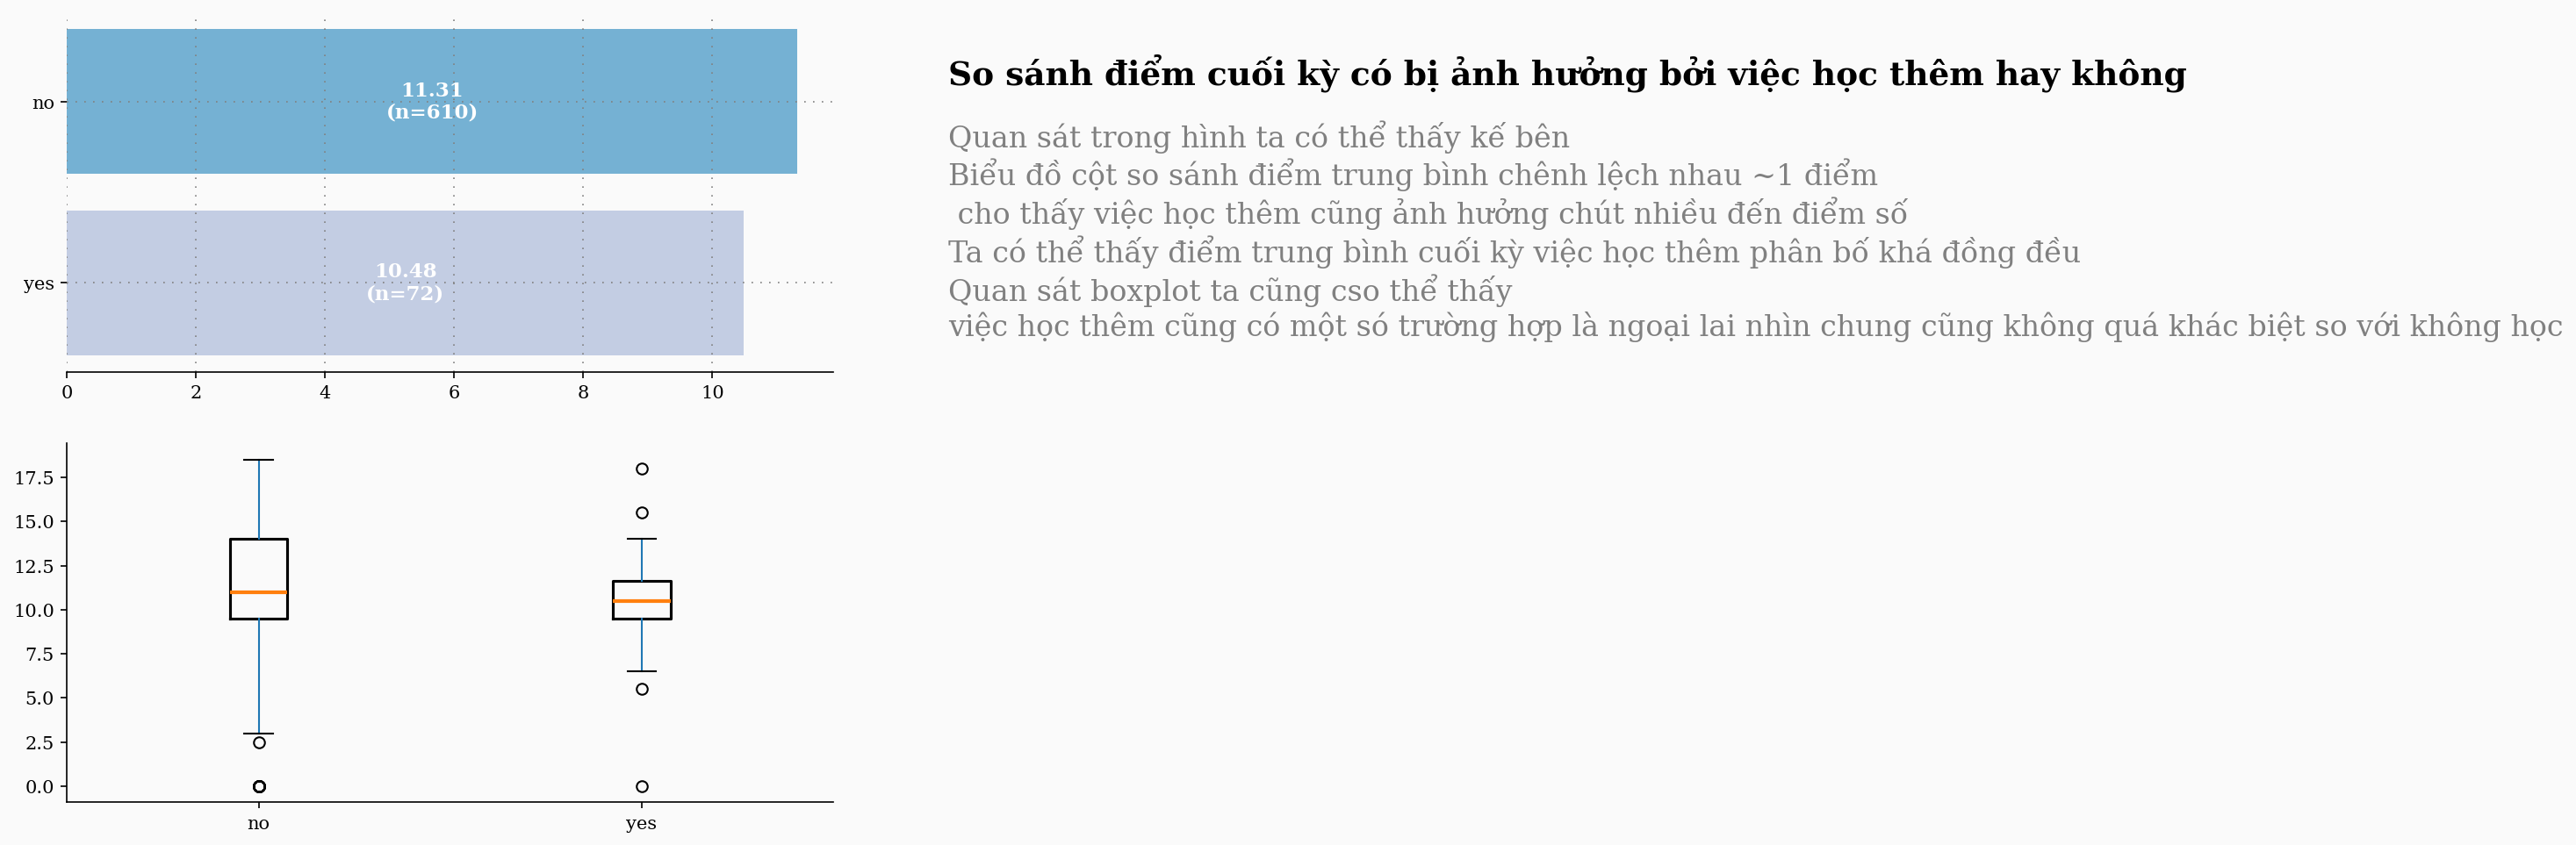

In [48]:
schoolsup_stats = (student_merge
                .groupby('schoolsup')['G3']
                .agg(mean='mean', n='count')
                .sort_values('mean'))

colors = palette

fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], width_ratios=[2, 1], hspace=0.2, wspace=0.2)

ax_bar = fig.add_subplot(gs[0, 0])
ax_text = fig.add_subplot(gs[0, 1])
ax_box = fig.add_subplot(gs[1, 0])


ax_bar.barh(schoolsup_stats.index, schoolsup_stats['mean'], color=colors, alpha=0.9)

for y, (mean_val, n_val) in enumerate(zip(schoolsup_stats['mean'], schoolsup_stats['n'])):
    ax_bar.annotate(f"{mean_val:.2f}\n(n={n_val})",
                    xy=(mean_val / 2, y),   # giữa cột
                    va='center', ha='center',
                    fontsize=11, color='white',
                    fontweight='bold')

ax_bar.set_xlabel("")
ax_bar.set_ylabel("")

for s in ['top', 'right', 'left']:
    ax_bar.spines[s].set_visible(False)

ax_bar.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
ax_bar.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

student_merge.boxplot(column='G3', by='schoolsup', ax=ax_box,
                      grid=False,
                      boxprops=dict(linewidth=1.5),
                      medianprops=dict(linewidth=2))

for s in ['top', 'right']:
    ax_box.spines[s].set_visible(False)

ax_box.set_xlabel("")
ax_box.set_ylabel("")
ax_box.set_title("")

plt.suptitle("")
ax_text.axis('off')  # Ẩn trục

ax_text.text(0, 0.8,
             "So sánh điểm cuối kỳ có bị ảnh hưởng bởi việc học thêm hay không",
             fontsize=18, fontweight='bold', fontfamily='serif')

ax_text.text(0, 0.1,
             "Quan sát trong hình ta có thể thấy kế bên\nBiểu đồ cột so sánh điểm trung bình chênh lệch nhau ~1 điểm\n cho thấy việc học thêm cũng ảnh hưởng chút nhiều đến điểm số\n"
             "Ta có thể thấy điểm trung bình cuối kỳ việc học thêm phân bố khá đồng đều\n"
             "Quan sát boxplot ta cũng cso thể thấy \nviệc học thêm cũng có một só trường hợp là ngoại lai nhìn chung cũng không quá khác biệt so với không học",
             fontsize=16,  color="gray")

plt.show()

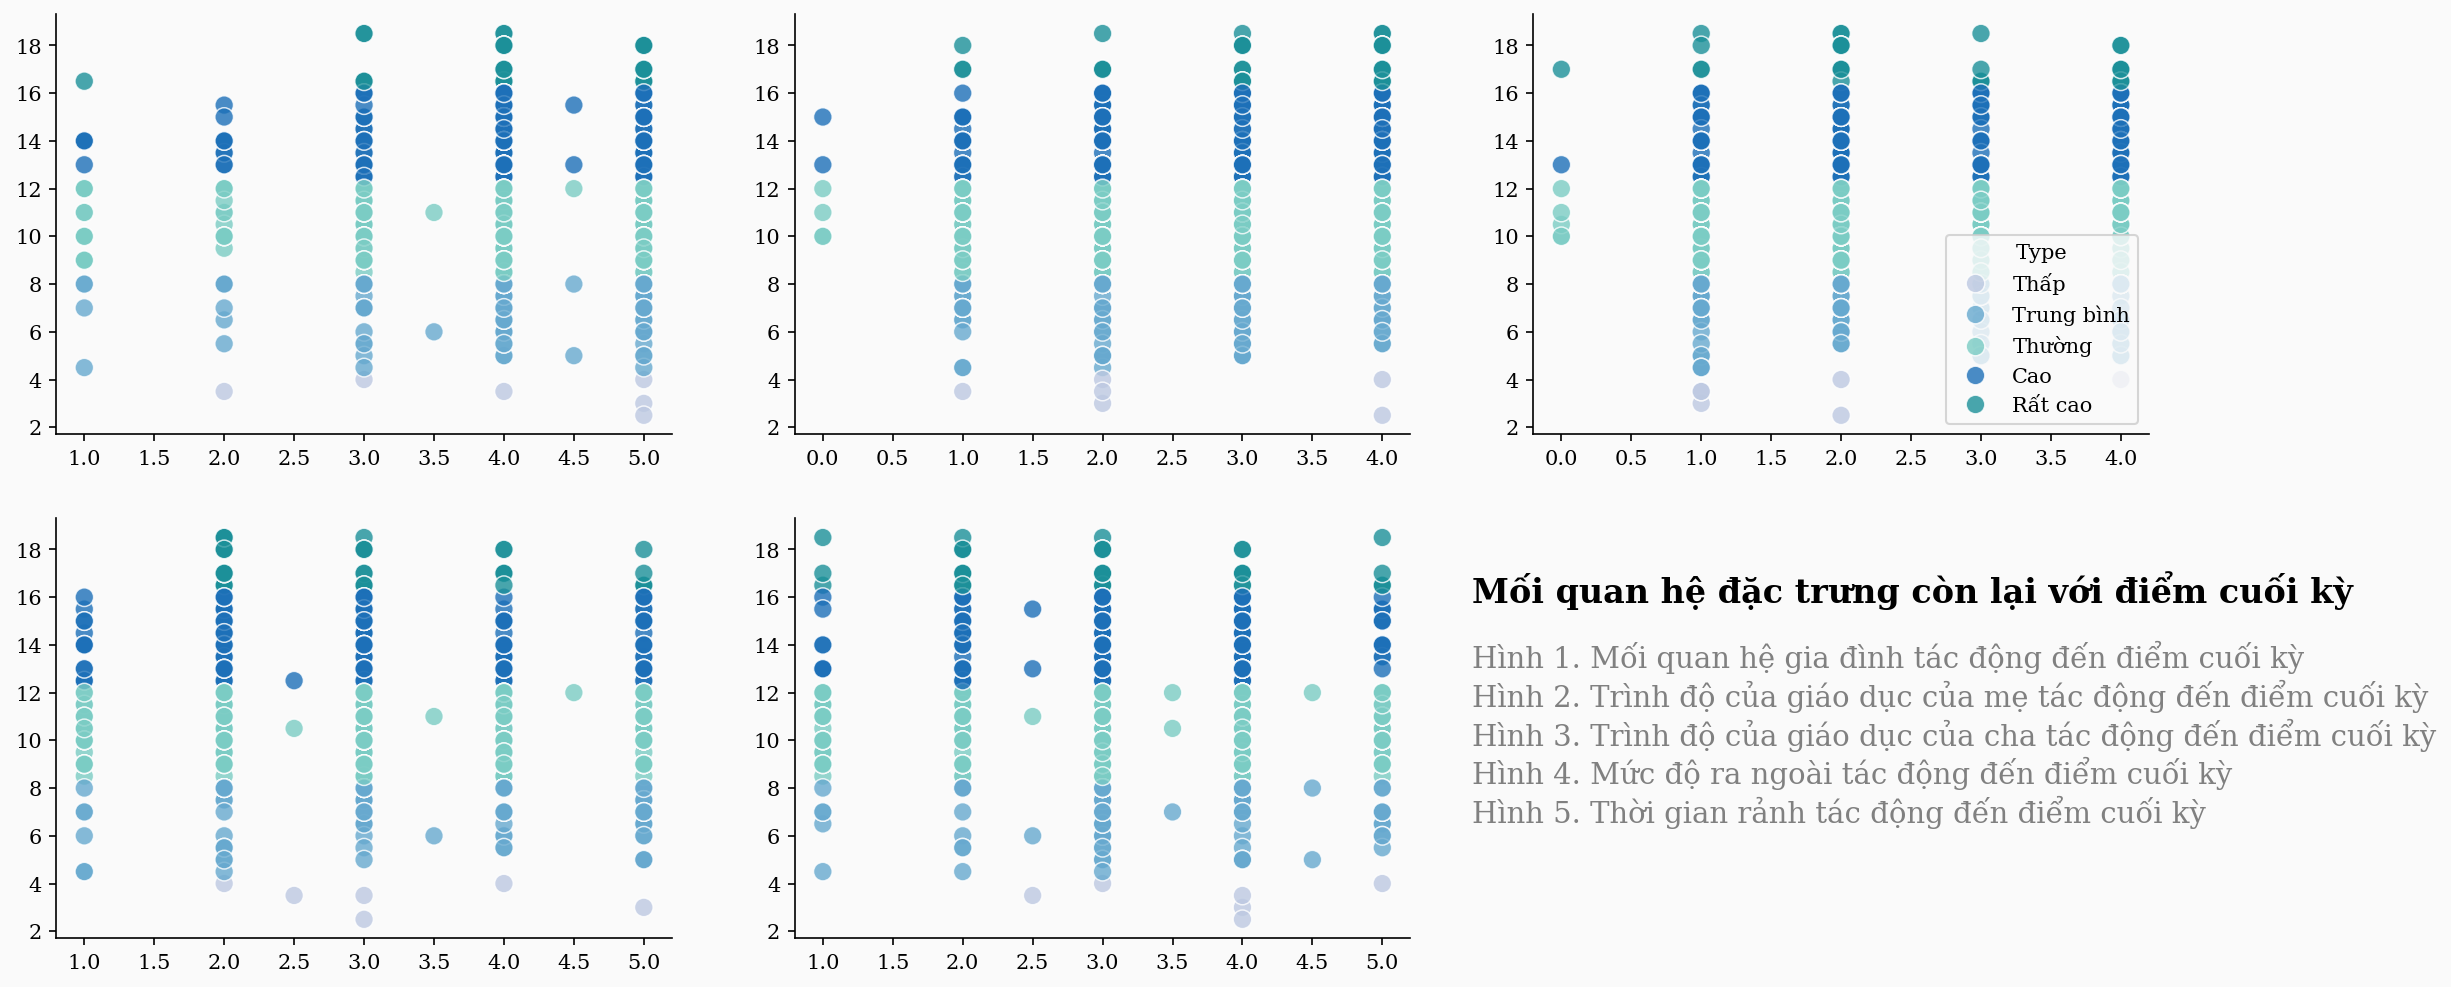

In [49]:
student_merge["Type"] = pd.cut(
    student_merge["G3"],
    bins = [0, 4, 8, 12, 16, 20],
    labels = ["Thấp", "Trung bình", "Thường", "Cao", "Rất cao"]
)

colors = palette

fig = plt.figure(figsize=(18, 8))
gs = fig.add_gridspec(2, 3, hspace=0.2, wspace=0.2)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])

sns.scatterplot(
    ax=ax0,
    data=student_merge,
    x="famrel",
    y="G3",
    hue="Type",
    legend=False,
    palette=palette,
    alpha=0.8,
    s=80
)

sns.scatterplot(
    ax=ax1,
    data=student_merge,
    x="Medu",
    y="G3",
    hue="Type",
    palette=palette,
    legend=False,
    alpha=0.8,
    s=80
)

sns.scatterplot(
    ax=ax2,
    data=student_merge,
    x="Fedu",
    y="G3",
    hue="Type",
    palette=palette,
    alpha=0.8,
    s=80
)

sns.scatterplot(
    ax=ax3,
    data=student_merge,
    x="goout",
    y="G3",
    hue="Type",
    palette=palette,
    legend=False,
    alpha=0.8,
    s=80
)

sns.scatterplot(
    ax=ax4,
    data=student_merge,
    x="freetime",
    y="G3",
    hue="Type",
    palette=palette,
    legend=False,
    alpha=0.8,
    s=80
)


for s in ['top', 'right']:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)

plt.suptitle("")
ax5.axis('off')  # Ẩn trục

ax0.set_xlabel("")
ax0.set_ylabel("")
ax1.set_xlabel("")
ax1.set_ylabel("")
ax2.set_xlabel("")
ax2.set_ylabel("")
ax3.set_xlabel("")
ax3.set_ylabel("")
ax4.set_xlabel("")
ax4.set_ylabel("")



ax5.text(-0.1, 0.8,
             "Mối quan hệ đặc trưng còn lại với điểm cuối kỳ",
             fontsize=16, fontweight='bold')

ax5.text(-0.1, 0.2,
             "Hình 1. Mối quan hệ gia đình tác động đến điểm cuối kỳ\n"
             "Hình 2. Trình độ của giáo dục của mẹ tác động đến điểm cuối kỳ\n"
             "Hình 3. Trình độ của giáo dục của cha tác động đến điểm cuối kỳ\n"
             "Hình 4. Mức độ ra ngoài tác động đến điểm cuối kỳ\n"
             "Hình 5. Thời gian rảnh tác động đến điểm cuối kỳ\n",
             fontsize=14,  color="gray")

plt.show()

**Insight**

Quan sát  ta nhận thấy:

Hình 1
- Việc có mối quan hệ tốt với gia đình **nằm trong khoảng mức 3 đên 5** sẽ có khả năng đạt được cac kết quả tốt, đương nhiên còn phụ thuộc nhiều vào các yếu tố khác
- Bộ dữ liệu thu thâp khá ít các học sinh có mối quan hệ thâp **mức 1 trong Biểu đồ 1**
- Bộ dữ liệu phần lớn cũng thu thập mẫu các học sinh có mối quan hệ lớn trong khoảng từ **3 - 5** và  ta cũng thấy các kết quả là từ trung bình dến cao là chu yếu


Hình 2
- Việc thu thập dữ liệu phần lớn là tư các mức **1 đến 4** cũng ất ấn tượng khi ta cũng có trình độ mức **0-05** cho tháy rằng. **Trình độ giáo dục của người mẹ ít nhiều cũng ảnh hưởng đến con**
- Qua sát thấy các bà mẹ có trình độ từ **1 - 4** con họ thường có các kết quả từ Trung bình đến cao
- Chỉ có phần ít các bà mẹ có trình độ giáo dục 0 con họ mới có các số điểm cao

Hình 3
- Tương tự như ở người mẹ **Trình độ giáo dục người cha** cũng có ảnh hưởng ít nhiều đến học vấn con em.
- Nhũng người cha có trình độ **1 - 4** đa số con họ sẽ có kết quả học tập tốt

Hình 4
- Quan sát cho thấy việc ta ra ngoài không ảnh hướng đến kết quả học tập
- Việc tần suất ra ngoài ít hay không cũng không có quyết định nhiều đến việc thành tích học tập (biểu đồ khá rời rạc)

Hình 5
- Giống vời tần suất ra ngoài thì thời gian bạn rảnh càng nhiều thì cũng không tác động mấy đến với kết quả học tập
- Tuy nhiên khi thời gian rảnh nằm trong khoảng trung bình **2 đến 3** trong bộ dữ liệu này có học lực cao đến cực cao hơn thời gian rảnh khác
- Đồng thời càng rảnh thì cũng có khả năng đạt được kết quả học tập cao

## **🔍 Correlation Analysis (Phân tích quan hệ)**

## **✅ EDA Summary (Tóm tắt Khám phá dữ liệu)**